In [1]:
import pandas as pd
import numpy as np

## Aufgabe 1: Logistische Regression mit sklearn

#### a) Daten vorbereiten

Lesen Sie den Diabetes-Datensatz ein. Spalten Sie die Zielvariable (Outcome) ab und splitten Sie die Daten anschließend in Trainings- und Testdaten, sodass die Testdaten 30% der ursprünglichen Samples enthalen.

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

X = pd.read_csv('diabetes.csv')

train, test = train_test_split(X, test_size = 0.30)

#### b) Logistisches Regressionsmodell auf dem Datensatz trainieren

Trainieren Sie in Logistisches Regressionsmodell auf den Trainingsdaten.

In [3]:
y_train = train.iloc[:,-1]
X_train = train.drop(X.columns[-1], axis=1)

y_test = test.iloc[:,-1]
X_test = test.drop(X.columns[-1], axis=1)

In [4]:
from sklearn.linear_model import LogisticRegression


clf = LogisticRegression(random_state=0, max_iter = 200).fit(X_train, y_train)

#### c) Modellanwendung -und -bewertung

Wenden Sie das Modell auf den Trainingsdatensatz und auf den Testdatensatz an und berechnen Sie jeweils die Konfusionsmatrix, die Accuracy, die Precision und den Recall. 

In [5]:
def stats(true, pred):
    c = confusion_matrix(true, pred)
    print("Confusion Matrix: \n", c)

    TP = c[0][0]
    FP = c[0][1]
    FN = c[1][0]
    TN = c[1][1]

    print("TN:", TN, "TP:",TP,"FN:",FN,"FP:",FP)

    acc = (TP+TN)/(TP+TN+FP+FN)

    print("Accuracy: \n", acc)

    recall = TP/(TP+FN)

    print("Recall: \n",recall)

    precision = TP/(TP+FP)

    print("Precision: \n",precision)

In [6]:
from sklearn.metrics import confusion_matrix

results_test = clf.predict(X_test)

results_train = clf.predict(X_train)

print("---------- Test ----------\n")
stats(y_test,results_test)
print("---------- Train ----------\n")
stats(y_train, results_train)

---------- Test ----------

Confusion Matrix: 
 [[134  17]
 [ 37  43]]
TN: 43 TP: 134 FN: 37 FP: 17
Accuracy: 
 0.7662337662337663
Recall: 
 0.783625730994152
Precision: 
 0.8874172185430463
---------- Train ----------

Confusion Matrix: 
 [[309  40]
 [ 79 109]]
TN: 109 TP: 309 FN: 79 FP: 40
Accuracy: 
 0.7783985102420856
Recall: 
 0.7963917525773195
Precision: 
 0.8853868194842407


#### d) ROC-Kurve zeichnen

Berechnen Sie die ROC-AUC-Scores für den Trainings- und den Testdatensatz und zeichen Sie die ROC-Kurven für den Trainings- und den Testdatensatz in ein gemeinsames Diagramm.

In [7]:
X_test

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
120,0,162,76,56,100,53.2,0.759,25
289,5,108,72,43,75,36.1,0.263,33
474,4,114,64,0,0,28.9,0.126,24
571,2,130,96,0,0,22.6,0.268,21
109,0,95,85,25,36,37.4,0.247,24
...,...,...,...,...,...,...,...,...
711,5,126,78,27,22,29.6,0.439,40
324,2,112,75,32,0,35.7,0.148,21
58,0,146,82,0,0,40.5,1.781,44
78,0,131,0,0,0,43.2,0.270,26


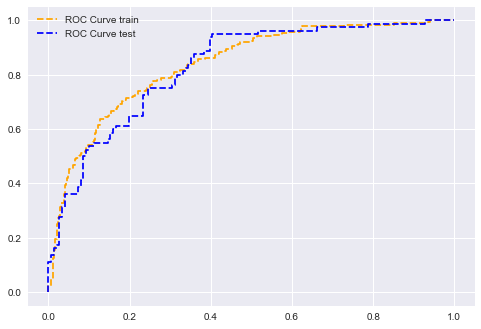

ROC_AUC_scores: 
Train:  0.838535633725538 
Test:  0.8290562913907286


In [8]:
from sklearn import metrics
import matplotlib.pyplot as plt

fpr, tpr, thresholds = metrics.roc_curve(y_train, clf.decision_function(X_train), pos_label=1)
fpr1, tpr1, thresholds1 = metrics.roc_curve(y_test, clf.decision_function(X_test), pos_label=1)

plt.style.use('seaborn')
plt.plot(fpr, tpr, linestyle='--',color='orange', label='ROC Curve train')
plt.plot(fpr1, tpr1, linestyle='--',color='blue', label='ROC Curve test')
plt.legend(loc='best')
plt.show()



ROC_AUC_score_test = metrics.roc_auc_score(y_test, clf.decision_function(X_test))
ROC_AUC_score_train = metrics.roc_auc_score(y_train, clf.decision_function(X_train))

print("ROC_AUC_scores: \nTrain: ", ROC_AUC_score_train,"\nTest: ",ROC_AUC_score_test)

#### e) Precision-Recall-Kurve zeichnen

Zeichen Sie die Precision-Recall-Kurve für den Trainings- und den Testdatensatz in ein gemeinsames Diagramm.

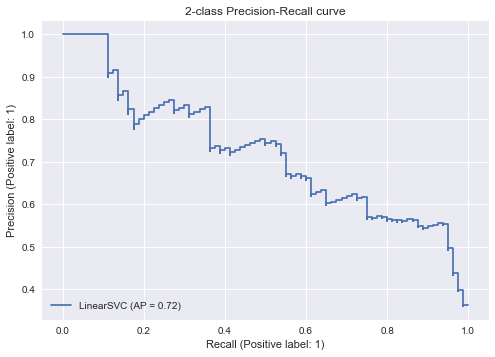

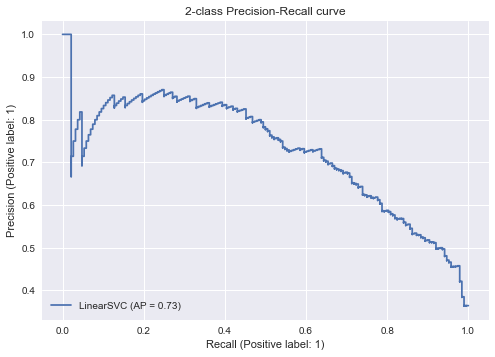

In [19]:
from sklearn.metrics import PrecisionRecallDisplay

display = PrecisionRecallDisplay.from_estimator(clf, X_test, y_test, name="LinearSVC")
_ = display.ax_.set_title("2-class Precision-Recall curve")

display = PrecisionRecallDisplay.from_estimator(clf, X_train, y_train, name="LinearSVC")
_ = display.ax_.set_title("2-class Precision-Recall curve")

#### f) Beurteilen Sie anhand der bisherigen Ergebnisse die Güte des Modells.

TODO

## Aufgabe 2: Implementierung eines Logistischen Regressionsmodells

In dieser Aufgabe soll ein Logistisches Regressionsmodell selbst implementiert werden und anhand des Iris-Datensatzes getestet werden.

#### Iris-Datensatz lesen

In [20]:
from sklearn.datasets import load_iris
X, y = load_iris(return_X_y=True)

In [21]:
X = X[0:100,0:2]
y = y[0:100].reshape(-1,1)

#### a) Logistische Funktion

Implementieren Sie die logistische Funktion $g(x)=\frac{1}{1+e^{-x}}$

In [23]:
def g(x):
    return 1/(1+math.e**-x)

#### b) Vektorisierte Modellfunktion

Implementieren Sie eine (vektorisierte) Funktion, die die Modellfunktion $f_{\vec{\theta}}(x)=g(\theta_0+\theta_1x_1+\ldots+\theta_px_p)=g(\vec{\theta}^T\vec{x})$ auf einem Datensatz bestehend aus $m$ Samples auswertet. Die Funktion soll den Vektor $\vec{\theta}=(\theta_0,\ldots,\theta_p)^T\in\mathbb{R}^{p+1}$ und die Daten-Matrix $M=\left(\begin{array}{ll}1&x^{(1)}_1&\ldots & x^{(1)}_p\\ 1 & x^{(2)}_1&\ldots & x^{(2)}_p\\ \vdots & \vdots &&\vdots \\ 1& x^{(m)}_1&\ldots & x^{(m)}_p\end{array}\right)$ als Argumente haben.

In [14]:
def f(M, theta):
    return #TODO

#### c) Vektorisiertes Kostenfunktional

Implementieren Sie das Kostenfunktional $J(\vec{\theta})= -\frac{1}{m}\sum_{i=1}^m y^{(i)}\log\left(f_{\vec{\theta}}(\vec{x}^{(i)})\right)+(1-y^{(i)})\log\left(1-f_{\vec{\theta}}(\vec{x}^{(i)})\right)$

In [15]:
def J(M, y, theta):
  #TODO

SyntaxError: unexpected EOF while parsing (<ipython-input-15-30bf50aeaf47>, line 2)

#### d) Gradientenverfahren

Implementieren Sie das Gradientenverfahren für die Logistische Regression

In [ ]:

def gradient_descent(M, y, theta, max_iter, tol):
    
    """
    Computes the weights of a logistic regression classifier using gradient descent
        
    Parameters:
        M (array of shape m x p+1): extended matrix of training examples (see above)
        y (array of shape m x 1): target values corresponding to X
        theta (array of shape p+1 x 1): initial values for the weights
        max_iter (int):  max number of iterations to be carried out
        tol: the iteration is stopped if norm(update)<tol
        
    Returns:
        theta (array of shape p+1 x 1): weights computed by gradient descent
    """
 

    #TODO

    

#### e) Implementierung des Klassifikators für Logistische Regression

Die folgende Klasse implementiert einen Klassifikator für Logistische Regression. Vervollständigen Sie die Methoden **predict_proba** und **predict**.

In [ ]:
class MyLogisticRegressionClassifier:
    
    def __init__(self, max_iter=100):
        self.theta = None
        self.max_iter = max_iter
    
    def fit(self, X, y):
        """
        Fits a Logistic regression classifier by employing gradient descent. The the resulting weights 
        are stored in self.theta
        
        Parameters:
            X (array of shape m x p): matrix training examples
            y (array of shape m x 1): target values corresponding to X
        """

        m, p = X.shape
        M = np.ones((m,p+1))
        M[:,1:] = X
        theta = np.zeros((p+1,1))
            
        self.theta = gradient_descent(M, y, theta, self.max_iter, 1e-5)
        
    def predict_proba(self, X):
        """
        Predicts the class probabilities for the positive class for samples (rows) in X
        
        Parameters:
            X (array of shape m x p): matrix containing the samples
        
        Returns:
            y (array of shape m x 1): array containing the predicted class probabilities
        
        """
        m, p = X.shape
        M = np.ones((m,p+1))
        M[:,1:] = X

        return #TODO
    
    def predict(self, X):
        """
        Predicts the class lables for all samples (rows) in X
        
        Parameters:
            X (array of shape m x p): matrix containing the samples
        
        Returns:
            y (array of shape m x 1): array containing predicted class labels
        
        """
        return #TODO

#### f) Anwendung des Klassifikators

Wenden Sie den Klassifikator auf den Iris-Datensatz an. Berechnen Sie die erzielte Accuracy auf dem gesamten Datensatz.

In [ ]:
#TODO

#### g) Decision Boundary

Zeichnen Sie in das folgende Diagramm den decision boundary ein.

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline


setosa = plt.scatter(X[0:50,0], X[0:50,1], c='r')
versicolor = plt.scatter(X[50:100,0], X[50:100,1], c='b')

plt.xlabel('sepal length')
plt.ylabel('sepal width')
plt.legend((setosa, versicolor), ('setosa', 'versicolor'))